# Sprint 9

## Neural Network

In [1]:
import numpy as np

In [2]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

### Check the dataset

In [3]:
print(X_train.shape) # (60000, 28, 28)
print(X_test.shape) # (10000, 28, 28)
print(X_train[0].dtype) # uint8
print(X_train[0])

(60000, 28, 28)
(10000, 28, 28)
uint8
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0 

In [4]:
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

### Visualization of image data

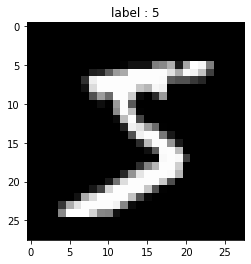

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
index = 0
image = X_train[index].reshape(28,28)
# X_train[index]: (784,)
# image: (28, 28)
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()

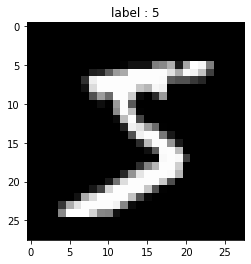

[[-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -1

In [6]:
index = 0
image = X_train[index].reshape(28,28)
image = image.astype(np.float) # Convert to float type
image -= 105.35 # Intentionally try to create a negative decimal value
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()
print(image) # Check the value

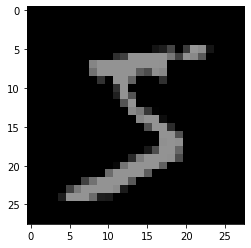

In [7]:
plt.imshow(image, 'gray', vmin = 0, vmax = 255)

### Preprocessing

In [8]:
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255
print(X_train.max()) # 1.0
print(X_train.min()) # 0.0

1.0
0.0


In [9]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])
print(y_train.shape) # (60000,)
print(y_train_one_hot.shape) # (60000, 10)
print(y_train_one_hot.dtype) # float64

(60000,)
(60000, 10)
float64


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
print(X_train.shape) # (48000, 784)
print(X_val.shape) # (12000, 784)
print(y_train.shape)
print(y_val.shape)

(48000, 784)
(12000, 784)
(48000,)
(12000,)


In [11]:
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_val_one_hot = enc.transform(y_val[:, np.newaxis])
print(y_train_one_hot.shape)
print(y_val_one_hot.shape)

(48000, 10)
(12000, 10)


### Scratch Neural Network

In [12]:
class ScratchSimpleNeuralNetworkClassifier():
    """
    Simple three-layer neural network classifier
    Parameters
    ----------
    Attributes
    ----------
    """
    def __init__(self, sigma=0.01, input_nodes=784, l1_nodes=400, l2_nodes=200,
                 output_nodes=10, learning_rate=0.01, epochs=10, 
                 batch_size=32, verbose=True):
        self.verbose = verbose
        self.sigma = sigma
        self.input_nodes = input_nodes
        self.l1_nodes = l1_nodes
        self.l2_nodes = l2_nodes
        self.output_nodes = output_nodes
        self.lr = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size
        self.train_loss = []
        self.val_loss = []
    
    def fit(self, X, y, X_val=None, y_val=None):
        """
        Learn a neural network classifier.
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        y : The following form of ndarray, shape (n_samples,)
            Correct answer value of training data
        X_val : The following forms of ndarray, shape (n_samples, n_features)
            Features of verification data
        y_val : The following form of ndarray, shape (n_samples,)
            Correct value of verification data
        """
        
        # Initialize weights
        self.W1 = self.init_wb(self.input_nodes, self.l1_nodes)
        self.W2 = self.init_wb(self.l1_nodes, self.l2_nodes)
        self.W3 = self.init_wb(self.l2_nodes, self.output_nodes)
        
        # Initialize biases
        self.b1 = self.init_wb(1, self.l1_nodes)
        self.b2 = self.init_wb(1, self.l2_nodes)
        self.b3 = self.init_wb(1, self.output_nodes)
        
        for i in range(self.epochs):
            if self.verbose:
                print(f"Epoch {i+1}:")
            get_mini_batch = GetMiniBatch(X, y, batch_size=self.batch_size)
            # Get batch
            for mini_X_train, mini_y_train in get_mini_batch:
                self.forward(mini_X_train)
                self.backward(mini_X_train, mini_y_train)
            self.forward(X)
            
            train_loss = self.cross_etp(y, self.Z3)
            self.train_loss.append(train_loss)
            if self.verbose:
                print(f"train_loss: {train_loss}")
            if X_val is not None and y_val is not None:
                self.forward(X_val)
                val_loss = self.cross_etp(y_val, self.Z3)
                self.val_loss.append(val_loss)
                if self.verbose:
                    print(f"val_loss: {val_loss}")
    
    def predict(self, X):
        """
        Estimate using a neural network classifier.
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            sample
        Returns
        -------
            The following form of ndarray, shape (n_samples, 1)
            Estimated result
        """
        self.forward(X)
        return np.argmax(self.Z3, axis=1)
    
    def init_wb(self, prev_nodes, next_nodes):
        return self.sigma * np.random.randn(prev_nodes, next_nodes)
    
    def forward(self, X):
        self.A1 = X @ self.W1 + self.b1
        self.Z1 = self.tanh(self.A1)
        self.A2 = self.Z1 @ self.W2 + self.b2
        self.Z2 = self.tanh(self.A2)
        self.A3 = self.Z2 @ self.W3 + self.b3
        self.Z3 = self.softmax(self.A3)
    
    def backward(self, X, y):
        dA3 = self.Z3 - y
        db3 = np.sum(dA3, axis=0)
        dW3 = self.Z2.T @ dA3
        dZ2 = dA3 @ self.W3.T
        dA2 = dZ2 * (1 - self.tanh(self.A2) ** 2)
        db2 = np.sum(dA2, axis=0)
        dW2 = self.Z1.T @ dA2
        dZ1 = dA2 @ self.W2.T
        dA1 = dZ1 * (1 - self.tanh(self.A1) ** 2)
        db1 = np.sum(dA1, axis=0)
        dW1 = X.T @ dA1
        
        self.W3 -= self.lr * dW3
        self.b3 -= self.lr * db3
        self.W2 -= self.lr * dW2
        self.b2 -= self.lr * db2
        self.W1 -= self.lr * dW1
        self.b1 -= self.lr * db1
    
    def sigmoid(self, A):
        return 1 / (1 + np.exp(-A))
    
    def tanh(self, A):
        return np.tanh(A)
    
    def softmax(self, A):
        return np.exp(A) / np.sum(np.exp(A), axis=1).reshape(-1, 1)
    
    def cross_etp(self, y, Z):
        L = -np.sum(y * np.log(Z)) / len(y)
        return L

In [13]:
class GetMiniBatch:
    """
    Iterator to get a mini-batch
    Parameters
    ----------
    X : The following forms of ndarray, shape (n_samples, n_features)
      Training data
    y : The following form of ndarray, shape (n_samples, 1)
      Correct answer value
    batch_size : int
      Batch size
    seed : int
      NumPy random number seed
    """
    
    def __init__(self, X, y, batch_size = 20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)
        
    def __len__(self):
        return self._stop
    
    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1]        
    
    def __iter__(self):
        self._counter = 0
        return self
    
    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]

### Learning and estimation

In [14]:
neural_net = ScratchSimpleNeuralNetworkClassifier()
neural_net.fit(X_train, y_train_one_hot, X_val, y_val_one_hot)

Epoch 1:
train_loss: 0.21297850510131755
val_loss: 0.2316763322505762
Epoch 2:
train_loss: 0.14730729849789886
val_loss: 0.17966915015451626
Epoch 3:
train_loss: 0.10472805276874307
val_loss: 0.14863742517087292
Epoch 4:
train_loss: 0.08582278244310097
val_loss: 0.1372379678098984
Epoch 5:
train_loss: 0.06263524966580716
val_loss: 0.11851749258143598
Epoch 6:
train_loss: 0.056993584412889486
val_loss: 0.1216210072857434
Epoch 7:
train_loss: 0.04278116419783734
val_loss: 0.11335530735795726
Epoch 8:
train_loss: 0.02600515864313154
val_loss: 0.09752644386673061
Epoch 9:
train_loss: 0.02228106396422456
val_loss: 0.09924079919827675
Epoch 10:
train_loss: 0.017313031298561803
val_loss: 0.10524207436637671


In [15]:
y_train_pred = neural_net.predict(X_train)
y_val_pred = neural_net.predict(X_val)
print(y_train, y_train_pred)
print(y_val, y_val_pred)

[1 8 4 ... 7 8 4] [1 8 4 ... 7 8 4]
[1 0 5 ... 4 3 0] [1 0 5 ... 4 3 0]


In [16]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4742
           1       1.00      0.99      1.00      5375
           2       1.00      1.00      1.00      4772
           3       1.00      0.99      0.99      4862
           4       1.00      0.98      0.99      4699
           5       0.98      1.00      0.99      4322
           6       1.00      1.00      1.00      4808
           7       0.99      1.00      0.99      5033
           8       1.00      0.99      0.99      4646
           9       0.98      0.99      0.99      4741

    accuracy                           0.99     48000
   macro avg       0.99      0.99      0.99     48000
weighted avg       0.99      0.99      0.99     48000



In [17]:
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1181
           1       0.99      0.99      0.99      1367
           2       0.98      0.97      0.98      1186
           3       0.98      0.96      0.97      1269
           4       0.99      0.96      0.97      1143
           5       0.95      0.98      0.96      1099
           6       0.98      0.99      0.98      1110
           7       0.96      0.98      0.97      1232
           8       0.98      0.96      0.97      1205
           9       0.95      0.96      0.95      1208

    accuracy                           0.97     12000
   macro avg       0.97      0.97      0.97     12000
weighted avg       0.97      0.97      0.97     12000



### Learning curve plot

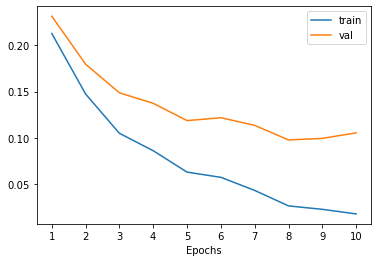

In [18]:
plt.plot(np.arange(1, neural_net.epochs+1), neural_net.train_loss, label='train')
plt.plot(np.arange(1, neural_net.epochs+1), neural_net.val_loss, label='val')
plt.xlabel('Epochs')
plt.xticks(np.arange(1, neural_net.epochs+1))
plt.legend()
plt.show()

### (Advance assignment) Confirmation of misclassification

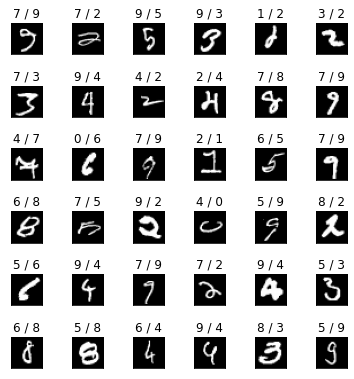

In [19]:
"""
Display word classification results side by side. The display above the image is "estimated result / correct answer".
Parameters:
----------
y_pred : Estimated ndarray (n_samples,)
y_val : Correct label of verification data (n_samples,)
X_val : Verification data features (n_samples, n_features)
"""
import numpy as np
import matplotlib.pyplot as plt
num = 36 # How many to display

true_false = y_val_pred==y_val
false_list = np.where(true_false==False)[0].astype(np.int)
if false_list.shape[0] < num:
    num = false_list.shape[0]
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=0.8,  bottom=0, top=0.8, hspace=1, wspace=0.5)
for i in range(num):
    ax = fig.add_subplot(6, 6, i + 1, xticks=[], yticks=[])
    ax.set_title("{} / {}".format(y_val_pred[false_list[i]],y_val[false_list[i]]))
    ax.imshow(X_val.reshape(-1,28,28)[false_list[i]], cmap='gray')